Question 1:  What is Simple Linear Regression?

Ans: Simple Linear Regression is a foundational statistical technique used to model the relationship between two variables (One Independent {x} and One Dependent {y})

Question 2: What are the key assumptions of Simple Linear Regression?

Ans: The key assumptions of the Linear Regression model is

a) Linearity: x & y should have linear relationship

b) Independence: The observation should be independent of each other

c) Homoscedasticity: The variance of the error should be constant

d) Normality: Errors should be normally distributed

e) Feature relation: Features should be either not related at all or should have the least realation with each other

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Ans: Heteroscedasticity states that the variance of the error should not be constant, it is important to address in regressions model as it is contradiction or the opposite of Homoscedasticity (Variance of the error should be constant) which is the key assumption of Simple Linear Regression

Question 4: What is Multiple Linear Regression?

Ans: Multiple Linear Regression is the extension of the Simple Linear Regression, which states the relationship between mutliple independent variable and one dependent variable.

Question 5: What is polynomial regression, and how does it differ from linear
regression?

Ans: Polynomial Regression is a type of regression analysis which is used when the relationship between the variables is non-linear

It differs from the linear regression as linear regression is type of regression for the relationship of the two variables which are linear

The coefficient is [1.98] and the intercept is 0.17999999999999794


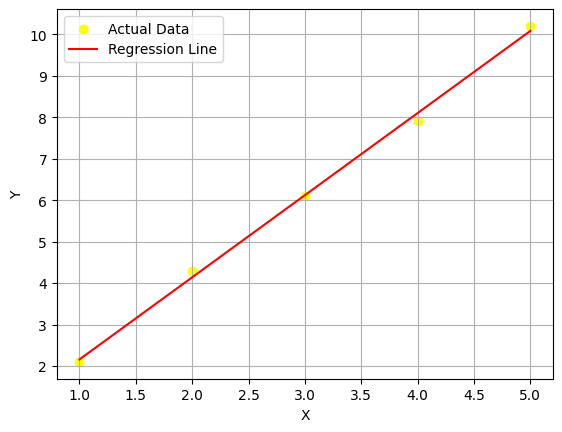

In [8]:
"""Question 6:  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2] """


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

X = [[1], [2], [3], [4], [5]]
Y = np.array(Y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, Y)

print(f"The coefficient is {lr.coef_} and the intercept is {lr.intercept_}")

Y_pred = lr.predict(X)

plt.scatter(X, Y, color = "yellow", label = "Actual Data")
plt.plot(X, Y_pred, color = "red", label = "Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

In [12]:
"""Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results. """

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({
    "Area" : Area,
    "Rooms" : Rooms,
    "Price" : Price
})

x = df[["Area", "Rooms"]]
y = df["Price"]


from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x, y)

print(f"Intercept: {lr.intercept_:.2f}")
print(f"Coefficients: {lr.coef_}")


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant term for intercept
x_with_const = add_constant(x)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_with_const.values, i)
                   for i in range(x_with_const.shape[1])]

print(vif_data)


Intercept: 103157.89
Coefficients: [   63.15789474 34736.84210526]
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


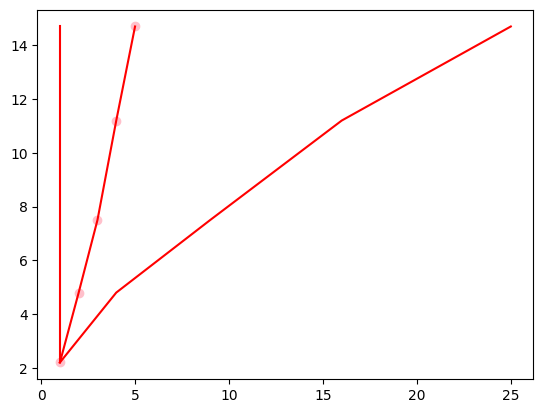

In [14]:
"""Question 8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve."""


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [2.2, 4.8, 7.5, 11.2, 14.7]

X = [[1], [2], [3], [4], [5]]

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)
X_poly = pf.fit_transform(X)

lr = LinearRegression()

lr.fit(X_poly, Y)

plt.scatter(X, Y, color = "pink")
plt.plot(X_poly, Y, color = "red")

plt.show()


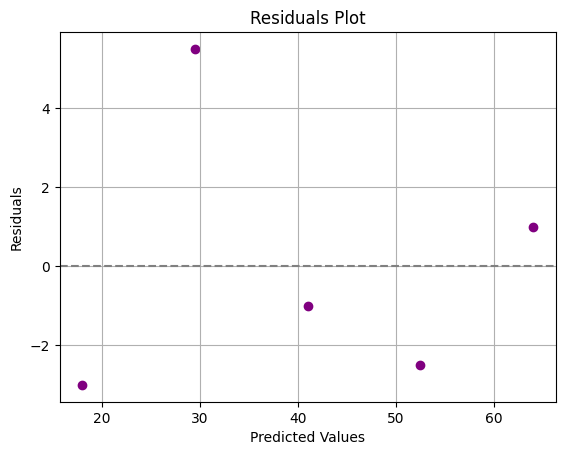

In [21]:
"""Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals."""


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

X = [10, 20, 30, 40, 50]
Y = [15, 35, 40, 50, 65]

X = [[1], [2], [3], [4], [5]]

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)


residuals = Y - Y_pred


plt.scatter(Y_pred, residuals, color='purple', marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()



Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.

If Heteroscedasticity

- Plot residuals vs. predicted values.
- Look for patterns like funnel shapes or increasing spread.
- Apply log, square root, or Box-Cox transformation to Price.
- Example: log(Price) often stabilizes variance.
- Switch to models like Huber Regression or Quantile Regression that are less sensitive to heteroscedasticity.


If Multicollinearity

- Use Variance Inflation Factor (VIF):
- VIF > 10 → problematic
- Check correlation matrix for high correlations between predictors.
- Remove one of the correlated features (e.g., if Area and Rooms are highly correlated).
- Or combine them into a single feature (e.g., Area per Room).
- Reduce dimensionality while preserving variance.
- Converts correlated features into uncorrelated components.
- Use Ridge Regression or Lasso Regression:

